In [8]:
from astropy.table import Table, Column
from astropy import units as u
from gammapy.estimators import FluxPoints
from gammapy.modeling.models import PowerLawSpectralModel, SkyModel
from gammapy.datasets import FluxPointsDataset
from gammapy.datasets import Datasets
from gammapy.modeling import Fit
from astropy.coordinates import SkyCoord
import numpy as np


In [9]:
data_name = 'VERITAS'

data = {
    "VER J2031+415": {
        "position":  SkyCoord(l=80.25, b=1.20, unit='deg', frame='galactic'),
        'spectral_model': 'pl',
        'reference_energy': "2300 GeV",
        'reference': 'https://iopscience.iop.org/article/10.3847/1538-4357/aac4a2',
        'flux_points': [
            (422, 750, 3.26e-15, 1.57e-15, np.nan, False),
            (750, 1330, 6.85e-16, 2.73e-16, np.nan, False),
            (1330, 2370, 1.97e-16, 8.26e-17, np.nan, False),
            (2370, 4220, 3.95e-17, 2.75e-17, np.nan, False),
            (4220, 7500, 3.62e-17, 1.24e-17, np.nan, False),
            (7500, 13300, 6.92e-18, np.nan, 6.92e-18, True),
            (13300, 23700, 1.26e-18, 1.38e-18, np.nan, False),
            (23700, 42200, 5.99e-19, 4.55e-19, np.nan, False),
                ],
    },
    "VER J2019+407": {
        "position":  SkyCoord(l=78.30, b=2.55, unit='deg', frame='galactic'),
        'spectral_model': 'pl',
        'reference_energy': "1500 GeV",
        'reference': 'https://iopscience.iop.org/article/10.3847/1538-4357/aac4a2',
        'flux_points': [
            (750, 1330, 1.56e-15, 4.17e-16, np.nan, False),
            (1330, 2370, 3.91e-16, 1.09e-16, np.nan, False),
            (2370, 4220, 2.65e-17, 3.03e-17, np.nan, False),
            (4220, 7500, 2.73e-17, 1.27e-17, np.nan, False),
                ],
    },
    "VER J2019+368": {
        "position":  SkyCoord(l=74.97, b=0.35, unit='deg', frame='galactic'),
        'spectral_model': 'pl',
        'reference_energy': "3110 GeV",
        'reference': 'https://iopscience.iop.org/article/10.3847/1538-4357/aac4a2',
        'flux_points': [
            (422, 750, 1.62e-15, 1.68e-15, np.nan, False),
            (750, 1330, 6.68e-16, 2.34e-16, np.nan, False),
            (1330, 2370, 3.31e-16, 7.2e-17, np.nan, False),
            (2370, 4220, 1.47e-16, 2.64e-17, np.nan, False),
            (4220, 7500, 4.29e-17, 1.09e-17, np.nan, False),
            (7500, 13300, 8.01e-18, 3.59e-18, np.nan, False),
            (13300, 23700, 3.3e-18, 1.6e-18, np.nan, False),
            (23700, 42200, 5.37e-19, 3.99e-19, np.nan, False),
                    ],
    },
    "VER J2018+367*": {
        "position":  SkyCoord(l=74.87, b=0.42, unit='deg', frame='galactic'),
        'spectral_model': 'pl',
        'reference_energy': "2710 GeV",
        'reference': 'https://iopscience.iop.org/article/10.3847/1538-4357/aac4a2',
        'flux_points': [
            (750, 1330, 2.98e-16, 1.35e-16, np.nan, False),
            (1330, 2370, 1.5e-16, 4.41e-17, np.nan, False),
            (2370, 4220, 5.12e-17, 1.63e-17, np.nan, False),
            (4220, 7500, 6.74e-18, 5.12e-18, np.nan, False),
            (7500, 13300, 3.1e-18, 2.44e-18, np.nan, False),
            (13300, 23700, 1.6e-18, 9.33e-19, np.nan, False),
                ],
    },
    "VER J2020+368*": {
        "position":  SkyCoord(l=74.13, b=0.19, unit='deg', frame='galactic'),
        'spectral_model': 'pl',
        'reference_energy': "3270 GeV",
        'reference': 'https://iopscience.iop.org/article/10.3847/1538-4357/aac4a2',
        'flux_points': [
            (750, 1330, 2.16e-16, 1.09e-16, np.nan, False),
            (1330, 2370, 9.96e-17, 3.48e-17, np.nan, False),
            (2370, 4220, 3.95e-17, 1.43e-17, np.nan, False),
            (4220, 7500, 4.34e-18, 4.55e-18, np.nan, False),
            (7500, 13300, 8.03e-18, 3.22e-18, np.nan, False),
            (13300, 23700, 2.29e-18, 1.27e-18, np.nan, False),
                ],
    },
    "VER J2016+371": {
        "position":  SkyCoord(l=74.94, b=1.16, unit='deg', frame='galactic'),
        'spectral_model': 'pl',
        'reference_energy': "2510 GeV",
        'reference': 'https://iopscience.iop.org/article/10.3847/1538-4357/aac4a2',
        'flux_points': [
            (681, 1470, 2.13e-16, 1.85e-16, np.nan, False),
            (1470, 3160, 3.96e-17, 2.53e-17, np.nan, False),
            (3160, 6810, 4.95e-18, 6.48e-18, np.nan, False),
            (6810, 14700, 2.55e-18, 2.36e-18, np.nan, False),
                ],
    },
    }

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


DatasetModels

Component 0: SkyModel

  Name                      : VER J2031+415
  Datasets names            : VER J2031+415
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.089   +/-    0.20             
    amplitude                     :   1.24e-13   +/- 2.4e-14 1 / (TeV s cm2)
    reference             (frozen):   2300.000       GeV         


DatasetModels

Component 0: SkyModel

  Name                      : VER J2031+415
  Datasets names            : VER J2031+415
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.089   +/-    0.20             
    amplitude                     :   1.24e-13   +/- 2.4e-14 1 / (TeV s cm2)
    reference             (frozen):   2300.000       GeV         

Component 1: SkyModel

  Name                      : VE

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


DatasetModels

Component 0: SkyModel

  Name                      : VER J2031+415
  Datasets names            : VER J2031+415
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.089   +/-    0.20             
    amplitude                     :   1.24e-13   +/- 2.4e-14 1 / (TeV s cm2)
    reference             (frozen):   2300.000       GeV         

Component 1: SkyModel

  Name                      : VER J2019+407
  Datasets names            : VER J2019+407
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.787   +/-    0.39             
    amplitude                     :   5.16e-13   +/- 9.6e-14 1 / (TeV s cm2)
    reference             (frozen):   1500.000       GeV         

Component 2: SkyModel

  Name                      : VER J2019+368
  Da

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


DatasetModels

Component 0: SkyModel

  Name                      : VER J2031+415
  Datasets names            : VER J2031+415
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.089   +/-    0.20             
    amplitude                     :   1.24e-13   +/- 2.4e-14 1 / (TeV s cm2)
    reference             (frozen):   2300.000       GeV         

Component 1: SkyModel

  Name                      : VER J2019+407
  Datasets names            : VER J2019+407
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.787   +/-    0.39             
    amplitude                     :   5.16e-13   +/- 9.6e-14 1 / (TeV s cm2)
    reference             (frozen):   1500.000       GeV         

Component 2: SkyModel

  Name                      : VER J2019+368
  Da

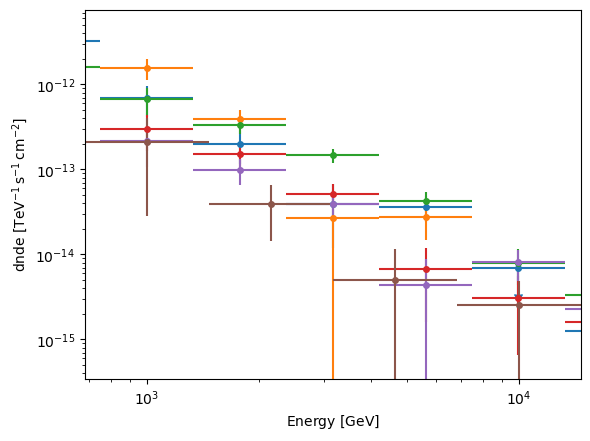

In [10]:
datasets_out = Datasets()
for source_name in list(data.keys()):
    _list = data[source_name]['flux_points']
    e_min = [_[0] for _ in _list]*u.GeV
    e_max = [_[1] for _ in _list]*u.GeV
    dnde = [_[2] for _ in _list]*u.Unit("GeV-1 cm-2 s-1")
    dnde_err = [_[3] for _ in _list]*u.Unit("GeV-1 cm-2 s-1")
    dnde_ul = [_[4] for _ in _list]*u.Unit("GeV-1 cm-2 s-1")
    is_ul = [_[5] for _ in _list]
    reference = data[source_name]['reference_energy']
    table = Table()
    sed_type = 'dnde'

    table["e_min"] = e_min
    table["e_min"].description = 'reference energy low'
    table["e_max"] = e_max
    table["e_max"].description = 'reference energy righ'

    table["dnde"] = dnde
    table["dnde"].description = 'Photon dnde (integral of dnde) between e_min and e_max'
    table["dnde_err"] = dnde_err
    table["dnde_err"].description = 'Symmetric 1-sigma error of the photon dnde'

    table["dnde_ul"] = dnde_ul
    table["dnde_ul"].description = 'Upper limit'

    table["is_ul"] = is_ul
    table["is_ul"].description = 'boolean flag to designate if is an upper limit'

    table.meta['source_name'] = source_name
    table.meta["SED_TYPE"] = sed_type
    table.meta['comments'] = ['reference: https://iopscience.iop.org/article/10.3847/1538-4357/aac4a2/pdf']

    flux_points = FluxPoints.from_table(
            table, 
            sed_type=sed_type,
    )
    spec_model = PowerLawSpectralModel(
        index=1.8,
        amplitude="2e-12 cm-2 s-1 TeV-1",
        reference=reference,
    )


    ds = FluxPointsDataset(data=flux_points, name=source_name)
    datasets = Datasets(ds)
    model_name = source_name

    model = SkyModel(spectral_model=spec_model, name=model_name)
    datasets.models = model

    fitter = Fit()
    result = fitter.run(datasets=datasets)
    model = SkyModel(spectral_model=model.spectral_model, name=model_name, datasets_names=source_name)

    dataset = FluxPointsDataset(data=flux_points, models = [model], name=source_name)
    dataset.data.plot()
    datasets_out.append(dataset)
    print(datasets_out.models)

In [11]:
datasets_out.write(filename='datasets.yaml',
                  filename_models='models.yaml', 
                  overwrite=True)

In [12]:
names = list(data.keys())
array = np.empty((len(names)))

table = Table()
table.meta['catalog_name'] = data_name
table.meta["SED_TYPE"] = "dnde"
table.meta['comments'] = ['Reference: https://iopscience.iop.org/article/10.3847/1538-4357/aac4a2',
]
table['source_name'] = names
table['source_name'].description = 'Source name'
table['ra'] = Column(
    data=array,
    description='Right Ascension (J2000)', unit='deg', format='.3f',
)

table['dec'] = Column(
    data=array,
    description='Declination (J2000)', unit='deg', format='.3f',
)

table['spectral_model'] = names
table['spectral_model'].description = 'Spectral Model Type'


for index, name in enumerate(names):
    table['ra'][index] =  data[name]["position"].icrs.ra.value
    table['dec'][index] = data[name]["position"].icrs.dec.value
    if data[name]["spectral_model"]:
        table['spectral_model'][index] = data[name]["spectral_model"]
    else: table['spectral_model'][index] = None
table

source_name,ra,dec,spectral_model
,deg,deg,
str14,float64,float64,str14
VER J2031+415,307.890,41.580,pl
VER J2019+407,304.930,40.769,pl
VER J2019+368,304.848,36.779,pl
VER J2018+367*,304.706,36.736,pl
VER J2020+368*,304.425,35.995,pl
VER J2016+371,303.988,37.209,pl


In [13]:
# names = table['source_name']
# table['source_name'] = [f"{_} (2018)" for _ in names]

In [14]:
table.write(f"veritas.fits",
    format = 'fits', 
    overwrite = True
) 